In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import warnings

warnings.filterwarnings(action='once')

In [2]:
path = "ex5data1.mat"
data = loadmat(path)
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Nov  4 22:27:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]),
 'y': array([[ 2.13431051],
        [ 1.17325668],
        [34.35910918],
        [36.83795516],
        [ 2.80896507],
        [ 2.12107248],
        [14.71026831],
        [ 2.61418439],
        [ 3.74017167],
        [ 3.73169131],
        [ 7.62765885],
        [22.7524283 ]]),
 'Xtest': array([[-33.31800399],
        [-37.91216403],
        [-51.20693795],
        [ -6.13259585],
        [ 21.26118327],
        [-40.31952949],
        [-14.54153167],
        [ 32.55976024],
        [ 13.39343255],
        [ 44.20988595],
        [ -1.14267768],
        [-

In [3]:
X, y = data['X'], data['y']
Xtest, ytest = data['Xtest'], data['ytest']
Xval, yval = data['Xval'], data['yval']

X.shape, Xtest.shape, Xval.shape, y.shape

((12, 1), (21, 1), (21, 1), (12, 1))

Text(0.5, 1.0, 'Figure1:data')

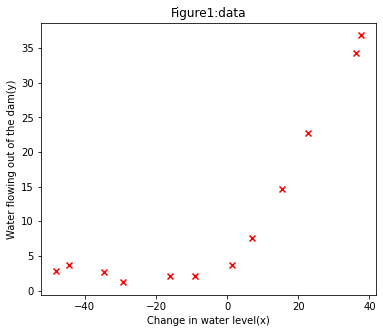

In [4]:
# visualizing the training dataset
plt.figure(figsize=(6, 5))
plt.scatter(X, y, marker='x', color='r')
plt.xlabel('Change in water level(x)')
plt.ylabel('Water flowing out of the dam(y)')
plt.title('Figure1:data')

In [5]:
# 令x0=1
X = np.insert(X, 0, np.ones(X.shape[0]), axis=1)
Xtest = np.insert(Xtest, 0, np.ones(Xtest.shape[0]), axis=1)
Xval = np.insert(Xval, 0, np.ones(Xval.shape[0]), axis=1)
# 合并成一句
# X, Xval, Xtest = [np.insert(x.reshape(x.shape[0], 1), 0, np.ones(x.shape[0]), axis=1) for x in (X, Xval, Xtest)]
X.shape, Xtest.shape, Xval.shape

((12, 2), (21, 2), (21, 2))

In [6]:
# cost function
def cost_func_reg(theta, X, y, lambda_reg):
    m = X.shape[0]
    theta = theta.reshape(1, theta.shape[0])
    temp1 = ((X @ theta.T) - y) ** 2   # 注意如果不将上一行的theta变为2维的，X @ theta.T 的shape为（12,）是一维，一维的array注意reshape成2维的
    temp2 = theta ** 2
    return (np.sum(temp1) + np.sum(temp2[1:]) * lambda_reg) / (2 * m)


In [7]:
theta = np.ones(X.shape[1])
lambda_reg = 1

In [8]:
cost_func_reg(theta, X, y, lambda_reg)

303.9515255535976

In [9]:
# the partial derivative of regularized linear regression
def grad_func_reg(theta, X, y, lambda_reg):
    m = X.shape[0]
    n = theta.shape[0]
    grad = np.zeros(theta.shape)
    theta = np.reshape(theta, (1, theta.shape[0]))
    part1 = X @ theta.T - y
    for j in range(n):
        part2 = part1 * X[:, j].reshape(X.shape[0], 1)
        if j == 0:
            grad[j] = np.sum(part2) / m
        else:
            grad[j] = np.sum(part2) / m + lambda_reg * theta[:, j] / m
    return grad

In [10]:
grad_func_reg(theta, X, y, lambda_reg)

array([-15.30301567, 598.25074417])

In [11]:
import scipy.optimize as opt

# 求theta的最优解
def train_linear_reg(theta, X, y, lambda_reg):
    result = opt.fmin_tnc(func=cost_func_reg, x0 = theta, fprime=grad_func_reg, args=(X, y, lambda_reg), disp=0)
    return result[0]

result = train_linear_reg(theta, X, y, 0)
result

array([13.08790324,  0.36777923])

Text(0.5, 1.0, 'Figure1: Linear Fit')

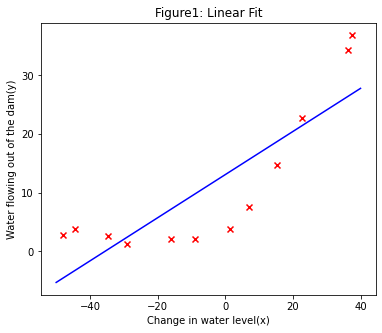

In [12]:
# 可以看到使用一次函数拟合数据欠拟合
final_theta = result
p_x = np.linspace(-50, 40, 100)
p_y = final_theta[0] + final_theta[1] * p_x

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 1:], y, marker='x', color='r')
plt.plot(p_x, p_y, 'b')
plt.xlabel('Change in water level(x)')
plt.ylabel('Water flowing out of the dam(y)')
plt.title('Figure1: Linear Fit')

In [13]:
train_error = []
cv_error = []

In [14]:
m = X.shape[0]
# 计算训练误差和交叉验证误差
for i in range(1, m + 1):
    result = train_linear_reg(theta, X[:i, :], y[:i, :], 0)
    te  = cost_func_reg(result, X[:i, :], y[:i, :], 0)
    cve = cost_func_reg(result, Xval, yval, 0)
    train_error.append(te)
    cv_error.append(cve)

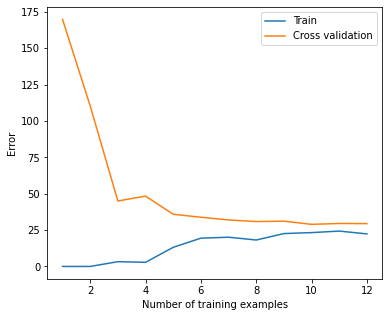

In [15]:
# high bias, underfitting
plt.figure(figsize=(6, 5))
plt.plot(np.arange(1, m + 1), train_error, label='Train') # 折线图
plt.plot(np.arange(1, m + 1), cv_error, label='Cross validation')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend()

In [16]:
X, y = data['X'], data['y']
Xtest, ytest = data['Xtest'], data['ytest']
Xval, yval = data['Xval'], data['yval']

X_orig = np.insert(X, 0, np.ones(X.shape[0]), axis=1)
Xtest_orig = np.insert(Xtest, 0, np.ones(Xtest.shape[0]), axis=1)
Xval_orig = np.insert(Xval, 0, np.ones(Xval.shape[0]), axis=1)

In [17]:
# normalization features
def normalization(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

In [18]:
# polynomial feature mapping
def poly_features(X, p):
    t = X[:, 0].reshape(X.shape[0], 1)
    X_t = X
    for i in range(2, p + 1):
        X_t =  np.append(X_t, np.power(t, i), axis=1)  # append追加一列
    return X_t

poly_features(X, 3)

array([[-1.59367581e+01,  2.53980260e+02, -4.04762197e+03],
       [-2.91529792e+01,  8.49896197e+02, -2.47770062e+04],
       [ 3.61895486e+01,  1.30968343e+03,  4.73968522e+04],
       [ 3.74921873e+01,  1.40566411e+03,  5.27014222e+04],
       [-4.80588295e+01,  2.30965109e+03, -1.10999128e+05],
       [-8.94145794e+00,  7.99496701e+01, -7.14866612e+02],
       [ 1.53077929e+01,  2.34328523e+02,  3.58705250e+03],
       [-3.47062658e+01,  1.20452489e+03, -4.18045609e+04],
       [ 1.38915437e+00,  1.92974986e+00,  2.68072045e+00],
       [-4.43837599e+01,  1.96991814e+03, -8.74323736e+04],
       [ 7.01350208e+00,  4.91892115e+01,  3.44988637e+02],
       [ 2.27627489e+01,  5.18142738e+02,  1.17943531e+04]])

In [19]:
degree = 8
X = normalization(poly_features(X, degree))
Xtest = normalization(poly_features(Xtest, degree))
Xval = normalization(poly_features(Xval, degree))

In [20]:
X, Xval, Xtest = [np.insert(x, 0, np.ones(x.shape[0]), axis=1) for x in (X, Xval, Xtest)]

In [21]:
X.shape, Xval.shape, Xtest.shape

((12, 9), (21, 9), (21, 9))

In [22]:
# 随着λ的变化，绘制相应的拟合图像
def plot_linear_fit(final_theta, X_orig, degree, lambda_reg):
    p_x = np.linspace(-50, 40, 100)
    p_y = final_theta[0]
    for i in range(1, degree + 1):
        p_y += final_theta[i] * normalization(np.power(p_x, i))  # 绘制假设函数时，要将X标准化，因为训练时使用的X是标准化后的

    plt.figure(figsize=(6, 5))
    plt.scatter(X_orig[:, 1:], y, marker='x', color='r')
    plt.plot(p_x, p_y, 'b')
    plt.xlabel('Change in water level(x)')
    plt.ylabel('Water flowing out of the dam(y)')
    
    plt.title(f'Linear Fit:  λ={lambda_reg}')
    
# 计算training error 和 cross validation error
def compute_error(theta, X, y, Xval, yval, lambda_reg):
    train_error = []
    cv_error = []
    for i in range(1, m + 1):
        result = train_linear_reg(theta, X[:i, :], y[:i, :], lambda_reg) # 注意：计算error时，所有的变量都必须是标准化后的
        te  = cost_func_reg(result, X[:i, :], y[:i, :], lambda_reg)
        cve = cost_func_reg(result, Xval, yval, lambda_reg)
        train_error.append(te)
        cv_error.append(cve)
    return train_error, cv_error

# 绘制学习曲线
def plot_learning_curve(train_error, cv_error):
    plt.figure(figsize=(6, 5))
    plt.plot(np.arange(1, m + 1), train_error, label='Train') # 折线图
    plt.plot(np.arange(1, m + 1), cv_error, label='Cross validation')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.legend()

In [23]:
# λ = 0
theta = np.ones(X.shape[1])
lambda_reg = 0
final_theta = train_linear_reg(theta, X, y, lambda_reg)
train_error, cv_error = compute_error(theta, X, y, Xval, yval, lambda_reg)

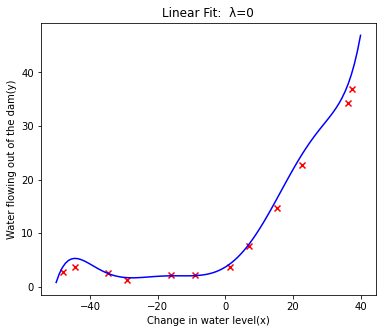

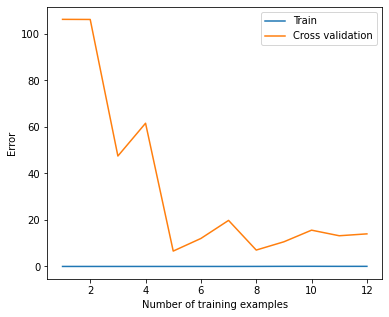

In [24]:
# 绘制拟合曲线
plot_linear_fit(final_theta, X_orig, degree, lambda_reg)

# 绘制学习曲线
plot_learning_curve(train_error, cv_error)

In [25]:
# λ = 1
theta = np.ones(X.shape[1])
lambda_reg = 1
final_theta = train_linear_reg(theta, X, y, lambda_reg)
train_error, cv_error = compute_error(theta, X, y, Xval, yval, lambda_reg)

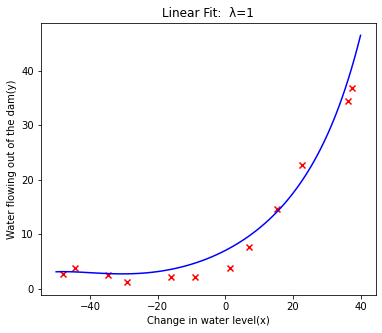

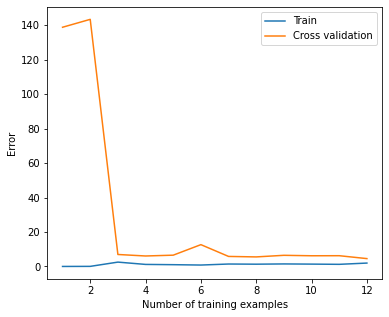

In [26]:
plot_linear_fit(final_theta, X_orig, degree, lambda_reg)

plot_learning_curve(train_error, cv_error)

In [27]:
# λ = 100
theta = np.ones(X.shape[1])
lambda_reg = 100
final_theta = train_linear_reg(theta, X, y, lambda_reg)
train_error, cv_error = compute_error(theta, X, y, Xval, yval, lambda_reg)

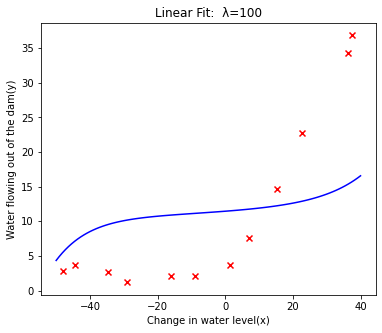

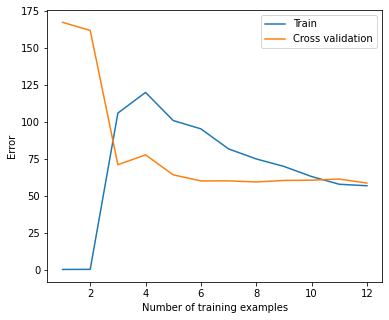

In [28]:
plot_linear_fit(final_theta, X_orig, degree, lambda_reg)

plot_learning_curve(train_error, cv_error)

In [29]:
lambda_range = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
train_error = []
cv_error = []
for i in lambda_range:
    temp_theta = train_linear_reg(theta, X, y, i)
    train_error.append(cost_func_reg(temp_theta, X, y, i))
    cv_error.append(cost_func_reg(temp_theta, Xval, yval, i))


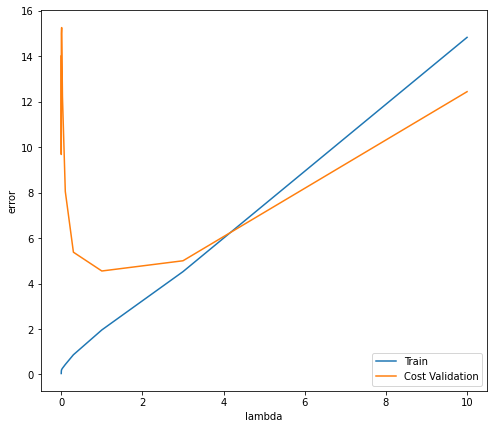

In [30]:
plt.figure(figsize=(8, 7))
plt.plot(lambda_range, train_error, label='Train')
plt.plot(lambda_range, cv_error, label='Cost Validation')
plt.xlabel('lambda')
plt.ylabel('error')
plt.legend()

# 最左边：overfitting 最右边:underfitting, λ大约等于3时，训练误差和验证误差相差较小且两者的值也较小，模型的效果最好

In [31]:
# 计算test error,  
for i in lambda_range:
    temp_theta = train_linear_reg(theta, X, y, i)
    teste = cost_func_reg(temp_theta, Xtest, ytest, i)
    print(f'test error(l = {i}) = {teste}')
    
# 可以看到，λ = 0.3时，test error最小

test error(l = 0) = 10.115500653721618
test error(l = 0.001) = 11.018013483644236
test error(l = 0.003) = 11.387950341297914
test error(l = 0.01) = 11.011084338923595
test error(l = 0.03) = 10.223061887367303
test error(l = 0.1) = 8.936053525584732
test error(l = 0.3) = 7.74562215823911
test error(l = 1) = 7.8632821472699606
test error(l = 3) = 11.772275367251357
test error(l = 10) = 26.8940677858072


In [32]:
lambda_reg = 0.01
theta = np.ones(X.shape[1])

In [33]:
train_error, cv_error = compute_error(theta, X, y, Xval, yval, lambda_reg)

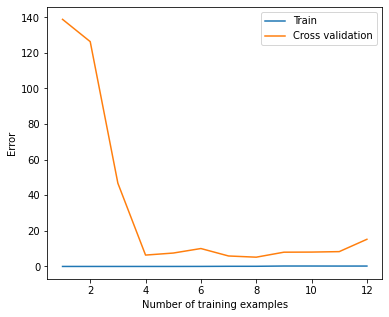

In [34]:
# 非随机选择样本
plot_learning_curve(train_error, cv_error)

In [35]:
def compute_error_random(theta, X, y, Xval, yval, lambda_reg):
    train_error = []
    cv_error = []
    times = 50
    for i in range(1, m + 1):
        te = 0
        cve = 0
        for j in range(times):
            idx = np.random.randint(X.shape[0], size = i)
            X_t = X[idx, :]
            y_t = y[idx, :]
            r_t = train_linear_reg(theta, X_t, y_t, lambda_reg)
            te += cost_func_reg(r_t, X_t, y_t, lambda_reg)
            cve += cost_func_reg(r_t, Xval, yval, lambda_reg)
        train_error.append(te / times)
        cv_error.append(cve / times)
    return train_error, cv_error

In [36]:
train_error, cv_error = compute_error_random(theta, X, y, Xval, yval, lambda_reg)

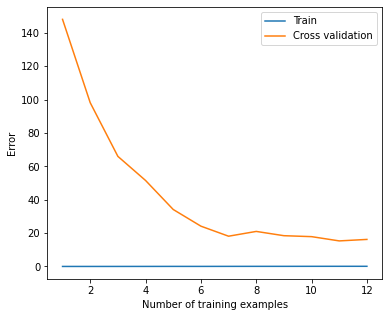

In [37]:
# 随机选择样本
plot_learning_curve(train_error, cv_error)